In [243]:
import pandas as pd 
import os 
import datetime

# 1. 导入数据

In [293]:
#os.chdir('D:\钉钉\CHARLS\数据\2018')
#os.listdir()

In [294]:
# 文件路径
file_path_Demographic_Background = r'D:\钉钉\CHARLS\数据\2018\\Demographic_Background.dta'
file_path_Family_Information = r'D:\钉钉\CHARLS\数据\2018\\Family_Information.dta'
file_path_Family_Transfer = r'D:\钉钉\CHARLS\数据\2018\\Family_Transfer.dta'
file_path_Health_Status_and_Functioning = r'D:\钉钉\CHARLS\数据\2018\\Health_Status_and_Functioning.dta'
file_path_Cognition = r'D:\钉钉\CHARLS\数据\2018\\Cognition.dta'
file_path_Insider = r'D:\钉钉\CHARLS\数据\2018\\Insider.dta'
file_path_Health_Care_and_Insurance = r'D:\钉钉\CHARLS\数据\2018\\Health_Care_and_Insurance.dta'
file_path_Work_Retirement = r'D:\钉钉\CHARLS\数据\2018\\Work_Retirement.dta'
file_path_Health_Care_and_Insurance = r'D:\钉钉\CHARLS\数据\2018\\Health_Care_and_Insurance.dta'
file_path_Pension = r'D:\钉钉\CHARLS\数据\2018\\Pension.dta'
file_path_Individual_Income = r'D:\钉钉\CHARLS\数据\2018\\Individual_Income.dta'
file_path_Housing = r'D:\钉钉\CHARLS\数据\2018\\Housing.dta'
file_path_Weights = r'D:\钉钉\CHARLS\数据\2018\\Weights.dta'
file_path_Sample_Infor = r'D:\钉钉\CHARLS\数据\2018\\Sample_Infor.dta'

# 2. 分析基本信息表 data_Demographic_Background

## 2.1 列出预计会使用的变量

- id related
    - ID：个人样本编码； 用于匹配
    - householdID：家庭id； 用于匹配
    - communityID：社区id； 用于匹配


- 性别：ba000_w2_3
- 属相：ba001
- 身份证或户口本上登记的出生年、月、日：ba004_w3_1, ba004_w3_2, ba004_w3_3 ;  
- 真实的出生年、月、日：ba002_1, ba002_2，ba002_3 ；公历还是农历：ba003


- 住址信息
    -回访受访者
    - bb000_w3：国内还是国外  
    - bb000_w3_1：居住类型  
    - bb000_w3_2：农村还是城市  
    -新受访者
    - bb001_w3：与上期一样、其他地方还是国外  
    - bb001_w3_1：居住类型  
    - bb001_w3_2：农村还是城市  
- 出生地：bb001


- 户口
    - bc001_w3_2：户口类型  
    - bc001_w3_3：户口所在地
    - bc002_w3_1：现在的户口类型（变化后）；bc002_w3_2：变化原因
    - bc002_w3_4：现在的户口所在地（变化后）；bc002_w3_5：变化原因


- 教育
    - bd001_w2_4：最高教育水平  
    - bd006：几岁读完书    
    - bd007_w4_1_s1-bd007_w4_1_s8：参加过的成人教育类型
    -回访受访者
    - bd012：是否参加过职业技术培训
    - bd013：培训次数；bd014：累积培训时间；bd015_w4：是否获得培训证书
    -新受访者
    - bd012_w4：是否参加过职业技术培训
    - bd013_w4：培训次数；bd014_w4：累积培训时间；bd017_w4：是否获得培训证书


- 婚姻状态：be001
- 民族：bg001_w4
- 是否有宗教信仰：bg002_w4；信仰种类：bg003_w4
- 是否是共产党员：bg004_w4；入党年份：bg004_w4_1


## 2.2 整体了解一下数据

In [295]:
data_Demographic_Background = pd.read_stata(file_path_Demographic_Background, convert_categoricals=False) 

In [296]:
data_Demographic_Background.shape

(19816, 112)

In [297]:
data_Demographic_Background.head()

,ID,householdID,communityID,ba000_w2_3,ba001,ba004_w3,ba004_w3_1,ba004_w3_2,ba004_w3_3,ba005_w4,...,xrgender,zfrgender,zfrzodiac,zfrbirth,ziwtime,zbc004,zfredu,versionID,cyear18,cmonth18
0,094004113002,0940041130,0940041,2,6,1,1954.0,1.0,31.0,2.0,...,2,1.0,1.0,1.0,2015年07月,2.0,1.0,20200914,2018,7
1,094004111002,0940041110,0940041,2,7,1,1954.0,6.0,15.0,1.0,...,2,1.0,1.0,1.0,2015年08月,2.0,1.0,20200914,2018,7
2,094004111001,0940041110,0940041,2,7,1,1954.0,6.0,15.0,1.0,...,2,1.0,1.0,1.0,2015年08月,2.0,1.0,20200914,2018,7
3,094004112001,0940041120,0940041,1,11,1,1946.0,10.0,9.0,1.0,...,1,1.0,1.0,1.0,2015年08月,1.0,1.0,20200914,2018,7
4,094004118001,0940041180,0940041,1,5,1,1952.0,4.0,14.0,2.0,...,1,1.0,1.0,1.0,2015年08月,2.0,1.0,20200914,2018,7


In [298]:
# check 缺失值； 等具体问题分析再处理数据清洗问题
data_Demographic_Background.isna().sum()

ID               0
householdID      0
communityID      0
ba000_w2_3       0
ba001            0
              ... 
zbc004         521
zfredu         315
versionID        0
cyear18          0
cmonth18         0
Length: 112, dtype: int64

In [299]:
# 数据量
print('样本量（个人）和变量数量：', data_Demographic_Background.shape) 
# 家庭数量
print('家庭数量： ', data_Demographic_Background['householdID'].unique().size)
# 社区数量
print('社区数量： ', data_Demographic_Background['communityID'].unique().size)

样本量（个人）和变量数量： (19816, 112)
家庭数量：  11635
社区数量：  449


## 2.3 性别分布

<AxesSubplot:title={'center':'性别分布'}>

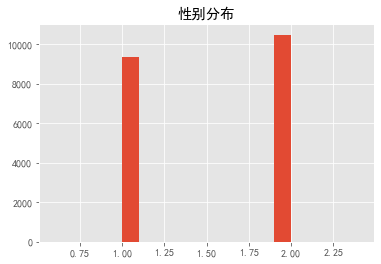

In [318]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# 设置字体
mpl.rcParams['font.sans-serif'] = ['SimHei']
# 设置风格
plt.style.use('ggplot')
a = Demographic_Background[~demo]['ba000_w2_3'].value_counts() # 1男 2女
plt.bar(a.index, a.values)
plt.title('性别分布')
Demographic_Background['ba000_w2_3'].hist()

## 2.4 年龄分布

In [319]:
# check data
print(Demographic_Background['ba004_w3_2'].describe())  # 月份
print(Demographic_Background['ba004_w3_1'].describe())  # 年份
# -9 为缺失值

count    19409.000000
mean         6.584832
std          3.496086
min          1.000000
25%          3.000000
50%          7.000000
75%         10.000000
max         12.000000
Name: ba004_w3_2, dtype: float64
count    19494.000000
mean      1956.257053
std         10.332225
min       1900.000000
25%       1949.000000
50%       1957.000000
75%       1965.000000
max       2000.000000
Name: ba004_w3_1, dtype: float64


In [320]:
print('月缺失数据：', Demographic_Background[Demographic_Background['ba004_w3_2']==-9].shape[0])
print('年缺失数据： ',Demographic_Background[Demographic_Background['ba004_w3_1']==-9].shape[0])
print('年缺失数据： ',Demographic_Background[Demographic_Background['ba004_w3_1']==-1].shape[0])  # check codebook, 年份有 -1（不知道）， -9
# 处理方法，剔除年缺失数据，月缺失数据补充月份为 6 

月缺失数据： 0
年缺失数据：  0
年缺失数据：  0


In [323]:
# 出生年、月：ba004_w3_1, ba004_w3_2 ;  调查年、月：令cyear18=2018, cmonth18=7  用于计算访问时的年龄
# 1. 合并年月
def combine_date(x):
#     print(x[0])
#     print(x[1])
#     print(str(x[0]).split('.')[0]+str(x[1]).split('.')[0])
    if (x[0] == -9) | (x[0] == -1):  # 剔除年份缺失数据
        return None
    else:
        if x[1] == -9:  # 月份缺失数据填 6 月
            return str(x[0]).split('.')[0]+'6'
        return str(x[0]).split('.')[0]+str(x[1]).split('.')[0]

Demographic_Background['birthday']=Demographic_Background[['ba004_w3_1','ba004_w3_2']].apply(combine_date,axis=1)
Demographic_Background['visitday']=Demographic_Background[['cyear18','cmonth18']].apply(combine_date,axis =1)

KeyError: "None of [Index(['cyear18', 'cmonth18'], dtype='object')] are in the [columns]"

In [325]:
data = pd.merge(data, Demographic_Background[['ba004_w3_1','ba004_w3_2']], how='inner'}

SyntaxError: closing parenthesis '}' does not match opening parenthesis '(' (<ipython-input-325-077f8337f816>, line 1)

In [314]:
# 2. 转换为 datetime 格式
Demographic_Background['birthday_dt']=pd.to_datetime(Demographic_Background['birthday'],format='%Y%m')
Demographic_Background['visitday_dt']=pd.to_datetime(Demographic_Background['visitday'],format='%Y%m')

ValueError: time data 'nannan' does not match format '%Y%m' (match)

In [310]:
# 计算年龄 用调查时间 - 出生日期
Demographic_Background['age']=(Demographic_Background['visitday_dt']-Demographic_Background['birthday_dt']).dt.days/365 

KeyError: 'visitday_dt'

In [311]:
Demographic_Background['age'].hist()
plt.title('年龄分布')

KeyError: 'age'

In [258]:
# 年龄分段
age_cut = [-1, 16, 23,46,60,120]
age_seg = pd.cut(Demographic_Background['age'],bins = age_cut,labels=['0-16','16-22','23-45','46-60','60+'])
Demographic_Background['age_segment']= age_seg.values
a = Demographic_Background['age_segment'].value_counts()
a

KeyError: 'age'

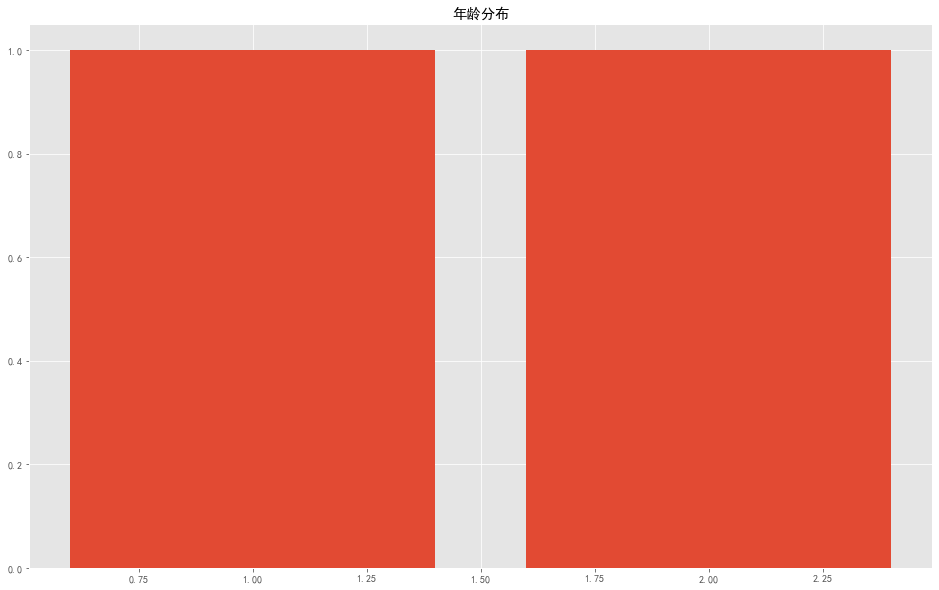

In [259]:
plt.figure(figsize=(16.18,10))
plt.bar(a.index, a.values)
plt.title('年龄分布')
plt.show()

In [266]:
# 年龄 + 性别  2：女  1：男
pd.crosstab(age_seg,Demographic_Background['ba000_w2_3'])

NameError: name 'age_seg' is not defined

In [267]:
# 年龄 + 婚姻情况 
# 1：已婚与配偶一同居住； 2：已婚，但因为工作等原因暂时没有跟配偶一起居住；3：分居； 4：离异； 5：丧偶； 6：从未结婚
pd.crosstab(age_seg,Demographic_Background['be001'])

NameError: name 'age_seg' is not defined

In [312]:
# 年龄 + 户口类型
# 1：农业； 2：非农业； 3：统一居民户； 4：没有户口
pd.crosstab(age_seg,Demographic_Background['bc002_w3_2'])

NameError: name 'age_seg' is not defined

# 3 家庭信息表  

## 3.1. 父母、子女以及兄弟姐妹信息 Family_Information.dta

- 父母信息
    
    [家庭受访者姓名]父母编码：1 亲生父亲，2 亲生母亲，3 养父，4 养母
     [家庭受访者的配偶姓名]父母编码：5 亲生父亲，6 亲生母亲，7 养父，8 养母
    - ca000_w4_1_1_：亲生父亲出生年份是否为zparbirth_1_； 
      - 1 Wrong则为ca001_w3_1_1_
    - ca000_w3_2_1_：父亲是否建在
    - ca000_w3_3_1_1_：去世年份；ca000_w3_3_2_1_：去世岁数
    - ca000_w4_1_2_：亲生母亲出生年份是否为zparbirth_2_；
      - 1 Wrong则为ca001_w3_1_2_
    - ca000_w3_2_2_：母亲是否建在
    - ca000_w3_3_1_2_：去世年份；ca000_w3_3_2_2_：去世岁数   

    - ca009_w4_i：最高学历是否是zparedu_i； 
      - 2 Wrong则为ca009_i
    - ca014_w4_i：职位最高的职业是否是zparocc_1_i；
      - 2 No则为ca014_i
    - ca023_w3_i：是否是共产党员
    - ca016_i：现在一般住在哪里
    
    
- 子女信息
    - cb050_w3：子女（亲生、继子女和养子女）
    - cb052_w4_i：不包括成人教育的最高学历是否是zchildedu_i；
      - 2 Wrong则为cb052_w3_i
    - cb053_i：现在一般住哪里 
    - cb055_i：目前的户口类型 
    - cb057_i：目前的户口所在地
    - cb063_w3_2_i：是否是共产党员
    - cb063_w4_6_i：信仰哪个宗教
    - cb070_w4_i：在上学还是工作？；
      - cb071_i：现在主要做什么工作；
      - cb059_w4_i：现在在上什么学
    - cb063_i：婚姻状况
    - cb063_w3_1_i：身体状况


- 兄弟姐妹信息
    - cc000_w4_1：一共有多少兄弟姐妹（包括继兄弟姐妹和养兄弟姐妹）
    - cc003_w4_1_i：不包括成人教育的最高学历是否是zsibedu_i；
      - 2 Wrong则为cc003_w3_i
    - cc015_w3_i：职位最高的职业是什么
    - cc004_w3_i：是否是共产党员
    - cc011_w3_i：婚姻状况
    - cc012_w3_i：身体状况
    

In [270]:
data_Family_Information = pd.read_stata(file_path_Family_Information, convert_categoricals=False) 

In [271]:
data_Family_Information.shape

(11628, 1539)

In [272]:
data_Family_Information.iloc[0:5,0:20]

,ID,householdID,communityID,cv009,ca000_w4_0_1_,ca000_w4_0_2_,ca000_w4_1_1_,ca000_w4_1_2_,ca000_w3_1_1_,ca000_w3_1_2_,ca000_w3_2_1_,ca000_w3_2_2_,ca000_w3_3_1_1_,ca000_w3_3_1_2_,ca000_w3_3_2_1_,ca000_w3_3_2_2_,ca001_w4_0_1_,ca001_w4_0_2_,ca001_w4_1_1_,ca001_w4_1_2_
0,094004113002,0940041130,0940041,NaN,1,NaN,1.0,NaN,NaN,NaN,2.0,NaN,2005.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
1,094004111001,0940041110,0940041,2.0,1,1.0,1.0,1.0,NaN,NaN,2.0,2.0,1997.0,2011.0,NaN,NaN,1.0,1.0,1.0,1.0
2,094004112001,0940041120,0940041,NaN,1,NaN,1.0,NaN,NaN,NaN,2.0,NaN,1996.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN
3,094004114001,0940041140,0940041,NaN,1,NaN,NaN,NaN,1918.0,NaN,2.0,NaN,1985.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,094004118001,0940041180,0940041,1.0,1,1.0,1.0,1.0,NaN,NaN,2.0,2.0,1964.0,2003.0,NaN,NaN,1.0,1.0,1.0,1.0


In [281]:
# check 缺失值； 等具体问题分析再处理数据清洗问题
data_Family_Information.isna().sum()

ID                    0
householdID           0
communityID           0
cv009              2929
ca000_w4_0_1_         0
                  ...  
zsibedu_s_12_     11623
zsibedu_s_13_     11626
zsibedu_s_14_     11627
hhmembernumber       30
versionID             0
Length: 1539, dtype: int64

## 3.2. 家庭交往与经济帮助 Family_Transfer.dta

- 与父母、子女间的交往 
- 与父母的交往
    - cd001_w4_i：父母现在和谁住在一起
    - cd002_w4_i：不住一起时多长时间看望一次
- 与子女的交往    
    - cd003_w4_i：与子女一起居住的时间
    - cd003_i：不住一起时多长时间见一次
    - cd004_i：不住一起时多长时间通过电话、短信、微信、信件或电子邮件联系一次


- 家庭得到及提供的经济帮助 
- 与父母间的经济支持
    - ce002_1：不住一起时父母总共给钱的数目；
    - ce002_2：父母定期给钱（生活费、水电费及电话费、房贷、房租费）的数目
    - ce002_3：父母总共给物的钱数；
    - ce002_4：父母定期给物（粮食、买菜、买衣服）的钱数
    - ce022_1：不住一起时总共给父母钱的数目；
    - ce022_2：定期给父母钱（生活费、水电费及电话费、房贷、房租费）的数目
    - ce022_3：总共给父母物的钱数；
    - ce022_4：定期给父母物（粮食、买菜、买衣服）的钱数
- 与子女间的经济支持    
    - ce009_1：不住一起时子女总共给钱的数目；
    - ce009_2：子女定期给钱（生活费、水电费及电话费、房贷、房租费）的数目
    - ce009_3：子女总共给物的钱数；
    - ce009_4：子女定期给物（粮食、买菜、买衣服）的钱数
    - ce029_1：不住一起时总共给子女钱的数目；
    - ce029_2：定期给子女钱（生活费、水电费及电话费、房贷、房租费）的数目
    - ce029_3：总共给子女物的钱数；
    - ce029_4：定期给子女物（粮食、买菜、买衣服）的钱数
- 与兄弟姐妹间的经济支持    
    - ce072_w2_1：从兄弟姐妹那里收到的总钱数（婚丧嫁娶、搬迁新房、新生儿、子女升学等情况下的随礼以及生病、生活困难等情况下的经济资助）
    - ce072_w2_2：兄弟姐妹定期给钱（生活费、水电费及电话费、房贷、房租费）的数目
    - ce072_w2_3：兄弟姐妹总共给物的钱数；
    - ce072_w2_4：兄弟姐妹定期给物（粮食、买菜、买衣服）的钱数
    - ce074_w2_1：总共给兄弟姐妹钱的数目；
    - ce074_w2_2：定期给兄弟姐妹钱（生活费、水电费及电话费、房贷、房租费）的数目
    - ce074_w2_3：总共给兄弟姐妹物的钱数；
    - ce074_w2_4：定期给兄弟姐妹物（粮食、买菜、买衣服）的钱数   
- 与其他亲戚朋友间的经济支持    
    - ce016_w4：因为婚丧嫁娶、搬迁新房、新生儿、子女升学等办酒席花费的钱数。
      - 没有为0、不知道或拒绝回答为-1
    - ce016_w3：过去一年从亲戚朋友那里收到的礼金数目（婚丧嫁娶、搬迁新房、新生儿、子女升学等情况下的随礼）
    - ce036_w3：过去一年给亲戚朋友的礼金数目
    - ce016：过去一年除礼金外，从亲戚朋友那里收到的钱物数目（包括生病、生活困难等情况下的经济资助，不包括借钱）
    - ce036：过去一年除礼金外，给亲戚朋友的钱物数目数目
    

- 提供照料时间
    - 过去一年，我大概花cf003_1周，一周cf003_2小时照看子女的孩子；我爱人大概花cf003_3周，一周cf003_4小时照看子女的孩子。
      - 没有照料为0、不足一周为1、一周不足一小时为1
    - cf004_w4：是否在日常活动方面给父母提供帮助（家务劳动、做饭、洗衣、外出、购物和财务管理）
      - 1 Yes，过去一年家庭受访者大约花cf005_w4_1周，一周cf005_w4_2小时照看父母
      - 家庭受访者的配偶大约花cf006_w4_1周，一周cf006_w4_2小时照看父母


In [277]:
data_Family_Transfer = pd.read_stata(file_path_Family_Transfer, convert_categoricals=False) 

In [278]:
data_Family_Transfer.shape

(11568, 1120)

In [282]:
data_Family_Transfer.iloc[0:5,0:20].iloc[0:5,0:20]

,ID,householdID,communityID,cd001_w4_1_,cd001_w4_2_,cd001_w4_3_,cd001_w4_4_,cd001_w4_5_,cd001_w4_6_,cd001_w4_7_,cd001_w4_8_,cd001_w3_1_1__s1,cd001_w3_1_1__s2,cd001_w3_1_1__s3,cd001_w3_1_1__s4,cd001_w3_1_1__s5,cd001_w3_1_1__s6,cd001_w3_1_1__s7,cd001_w3_1_1__s8,cd001_w3_1_1__s9
0,094004113002,0940041130,0940041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,094004111001,0940041110,0940041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,094004112001,0940041120,0940041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,094004114001,0940041140,0940041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,094004118001,0940041180,0940041,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [283]:
# check 缺失值； 等具体问题分析再处理数据清洗问题
data_Family_Transfer.isna().sum()

ID                   0
householdID          0
communityID          0
cd001_w4_1_      10130
cd001_w4_2_       9833
                 ...  
cf006_w4_2_5_    10967
cf006_w4_2_6_    10962
cf006_w4_2_7_    11561
cf006_w4_2_8_    11560
versionID            0
Length: 1120, dtype: int64

# 4 健康信息表  

## 4.1. 健康状况和功能信息 Health_Status_and_Functioning.dta

- 健康状况
- 一般健康状况和疾病史
    - da002：健康状况
      - 回访者与之前相比时的状态：da002_w2_1
    - da005：是否有残疾（躯体残疾、大脑受损、失明、聋、哑）问题
    - da006：开始患有的年份
    - da007：是否有医生曾告诉过患有慢性病（高血压、血脂异常、糖尿病等）
    - da009_1：第一次知道患有慢性病的年份、岁数da009_2
    - da010_w4：正在采用治疗慢性病的治疗方法
    - da048：15岁之前（包括15岁）的身体状况
    
    
- 生活方式和健康行为
    - da049：过去一个月内平均每天晚上真正睡着的小时数
    - da050：过去一个月内的午睡时间（分钟）
    - da051：是否每周至少持续体力活动（有氧运动、快速骑车，拖地、打太极，散步）十分钟
      - 1 Yes
        - da052：每周至少做体力活动十分钟的天数
        - da053：一天做体力活动的时间是否大于2小时；
          - da054：是否小于30分钟；- da055：是否小于4小时
    - da051_1：做体力活动的原因
    - da056：过去一个月进行的社交活动
      - 10 上网
        - da056_w4_1：上网的目的
        - da056_w4_2：是否会用手机支付（支付宝、微信）
        - da056_w4_3：是否使用微信
        - da056_w4_4：发不发微信朋友圈
     - da059：是否吸过烟
       - 1 Yes
         - da061：现在是否还在吸烟
         - da060：吸烟时一般抽什么烟
     - da067：过去一年是否喝酒、喝酒频率
         - da068：喝酒的种类
         - da071_1：开始饮酒的年份、da071_2：开始饮酒的年龄  


- 身体功能障碍以及辅助者
    - db001：跑或慢跑1公里是否有困难
      - 1 没有困难，2 有困难但仍可以完成，3 有困难、需要帮助，4 无法完成
    - db002：走1公里是否有困难
    - db003：走100米是否有困难
    - db004：在椅子上坐时间久了再站起来是否有困难
    - db005：连续不停地爬几层楼是否有困难
    - db006：弯腰、屈膝或者下蹲是否有困难
    - db007：手臂沿着肩向上伸展是否有困难
    - db008：提10斤重的东西是否有困难
    - db009：从桌上拿起一枚硬币是否有困难
    - db016：是否因为健康和记忆的原因，做家务活（房屋清洁、洗碗盘，整理被褥和房间摆设）有困难
      - db016_w2：做家务时是否有人帮助你
    - db019：是否因为健康和记忆的原因，管钱（支付账单、记录支出项目、管理财务）有困难
      - db019_w2：是否有人帮助你管钱
    - db022_w3_1：谁在困难中帮助你
      - 帮助了db023天，每天帮助db024小时
 

In [284]:
data_Health_Status_and_Functioning = pd.read_stata(file_path_Health_Status_and_Functioning, convert_categoricals=False) 

In [285]:
data_Health_Status_and_Functioning.shape

(19752, 896)

In [286]:
data_Health_Status_and_Functioning.iloc[0:5,0:20].iloc[0:5,0:20]

,ID,householdID,communityID,da002,da002_w2_1,da005_1_,da005_2_,da005_3_,da005_4_,da005_5_,da006_1_,da006_2_,da006_3_,da006_4_,da006_5_,da006_w4_1_,da006_w4_2_,da006_w4_3_,da006_w4_4_,da006_w4_5_
0,094004113002,0940041130,0940041,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,094004111002,0940041110,0940041,4.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,094004111001,0940041110,0940041,4.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,094004112001,0940041120,0940041,1.0,2.0,NaN,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,094004118001,0940041180,0940041,5.0,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [287]:
# check 缺失值； 等具体问题分析再处理数据清洗问题
data_Health_Status_and_Functioning.isna().sum()

ID                 0
householdID        0
communityID        0
da002           1474
da002_w2_1       338
               ...  
zda065         12185
zda069          6226
zda070         18251
zda071         13662
versionID          0
Length: 896, dtype: int64

## 4.2. 认知和抑郁信息 Cognition.dta

## 4.3. 知情人信息健康状况和功能信息 Insider.dta